# Apple stock prices

The purpose is to perform exploratory data analysis on apple stocks for the last 10 years to understand the data better.

In [1]:
# Install the required libraries if not installed

In [2]:
# Import the required libraries
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Fetch the dataset using Yahoo Finance API

In [3]:
# Define the ticker symbol and the date range
ticker = 'AAPL'
start_date = '2014-01-01'
end_date = '2024-06-01'

# Download the historical stock data
aapl_data = yf.download(ticker, start=start_date, end=end_date)

# Display the first few rows of the data
print("First few rows of the dataset:")
print(aapl_data.head())

[*********************100%%**********************]  1 of 1 completed

First few rows of the dataset:
                 Open       High        Low      Close  Adj Close     Volume
Date                                                                        
2014-01-02  19.845715  19.893929  19.715000  19.754642  17.273224  234684800
2014-01-03  19.745001  19.775000  19.301071  19.320715  16.893814  392467600
2014-01-06  19.194643  19.528570  19.057142  19.426071  16.985935  412610800
2014-01-07  19.440001  19.498571  19.211430  19.287144  16.864447  317209200
2014-01-08  19.243214  19.484285  19.238930  19.409286  16.971254  258529600


In [4]:
aapl_data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-01-02,19.845715,19.893929,19.715000,19.754642,17.273224,234684800
2014-01-03,19.745001,19.775000,19.301071,19.320715,16.893814,392467600
2014-01-06,19.194643,19.528570,19.057142,19.426071,16.985935,412610800
2014-01-07,19.440001,19.498571,19.211430,19.287144,16.864447,317209200
2014-01-08,19.243214,19.484285,19.238930,19.409286,16.971254,258529600
...,...,...,...,...,...,...
2024-05-24,188.820007,190.580002,188.039993,189.979996,189.979996,36294600
2024-05-28,191.509995,193.000000,189.100006,189.990005,189.990005,52280100
2024-05-29,189.610001,192.250000,189.509995,190.289993,190.289993,53068000


In [5]:
aapl_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2621 entries, 2014-01-02 to 2024-05-31
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2621 non-null   float64
 1   High       2621 non-null   float64
 2   Low        2621 non-null   float64
 3   Close      2621 non-null   float64
 4   Adj Close  2621 non-null   float64
 5   Volume     2621 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 143.3 KB


In [6]:
# Check for missing values
print("\nMissing values in the dataset:")
print(aapl_data.isnull().sum())


Missing values in the dataset:
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


In [7]:
# Basic statistics of the dataset
print("\nBasic statistics of the dataset:")
print(aapl_data.describe())


Basic statistics of the dataset:
              Open         High          Low        Close    Adj Close  \
count  2621.000000  2621.000000  2621.000000  2621.000000  2621.000000   
mean     81.957312    82.829897    81.134871    82.018227    79.957694   
std      58.607371    59.234562    58.020307    58.652695    59.105148   
min      17.684999    17.911785    17.626785    17.849285    15.607206   
25%      30.485001    30.660000    30.227501    30.487499    27.739758   
50%      50.480000    51.097500    50.162498    50.682499    48.822044   
75%     142.699997   144.339996   140.899994   142.809998   140.998428   
max     198.020004   199.619995   197.000000   198.110001   197.589523   

             Volume  
count  2.621000e+03  
mean   1.336192e+08  
std    8.377623e+07  
min    2.404830e+07  
25%    7.790620e+07  
50%    1.095604e+08  
75%    1.645604e+08  
max    1.065523e+09  


### Create Visualizations

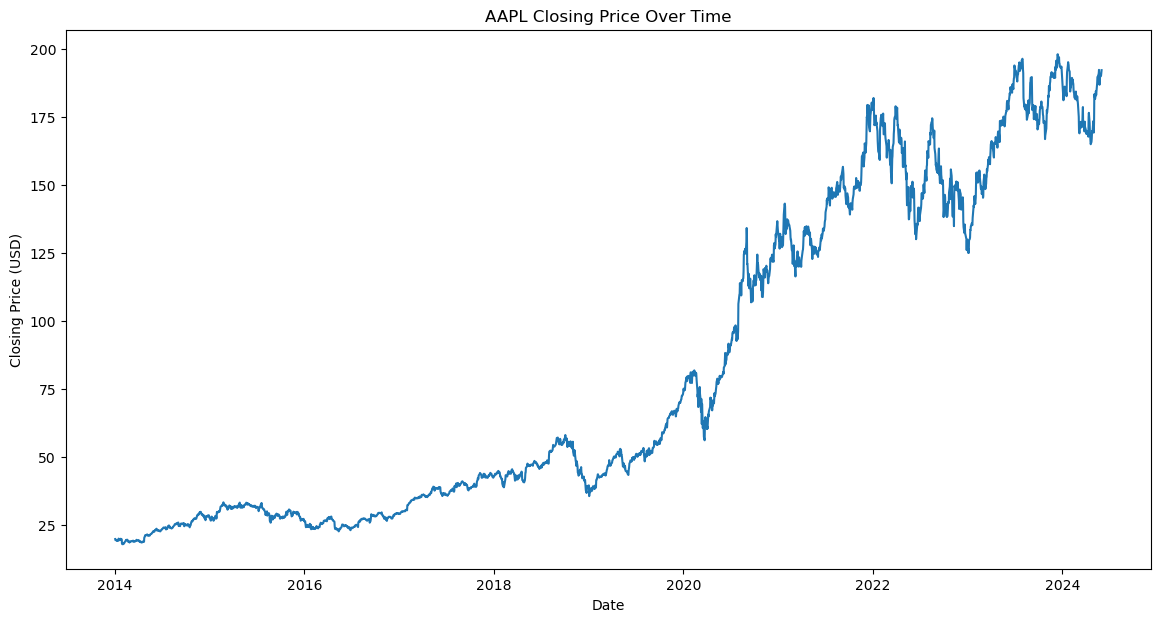

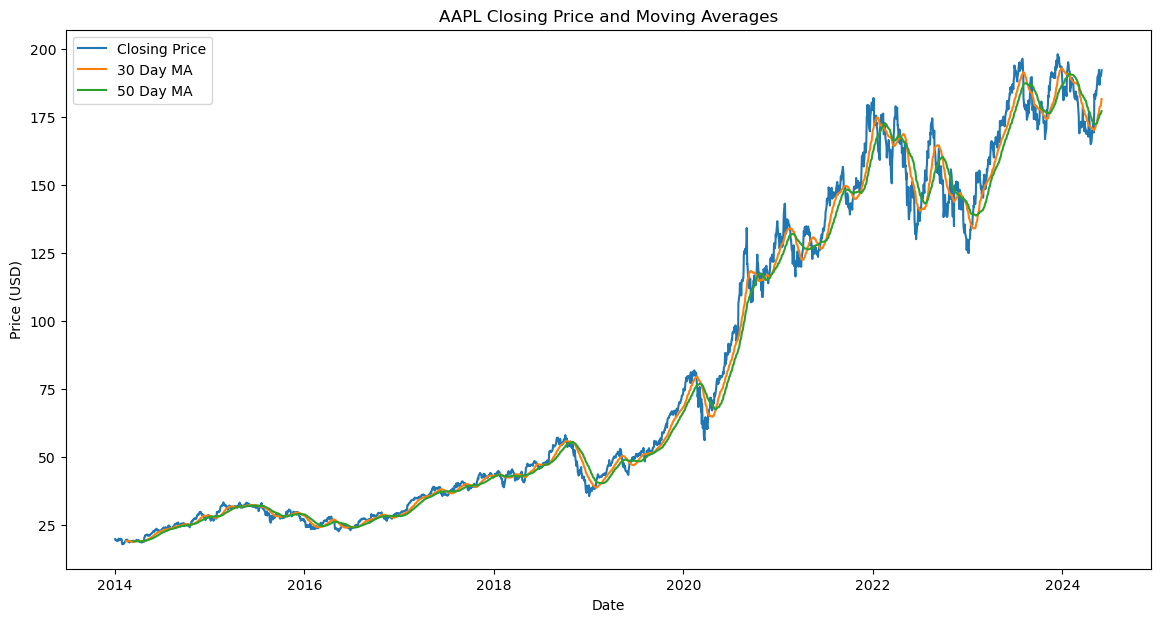

C:\Users\olubu\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


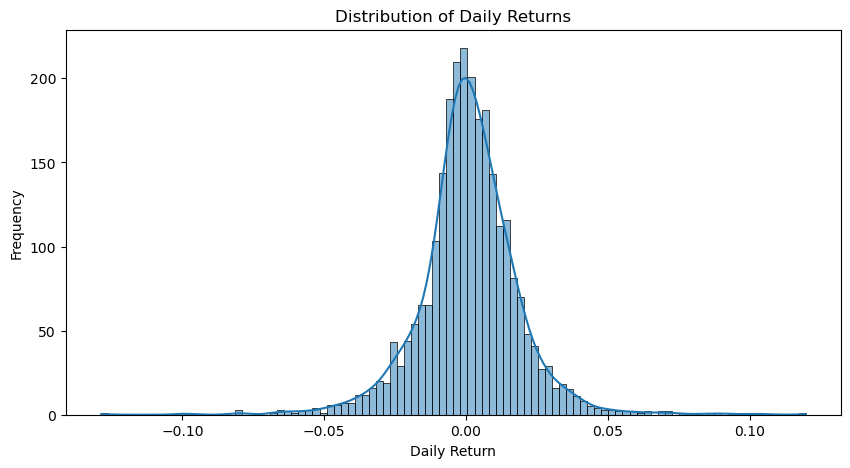

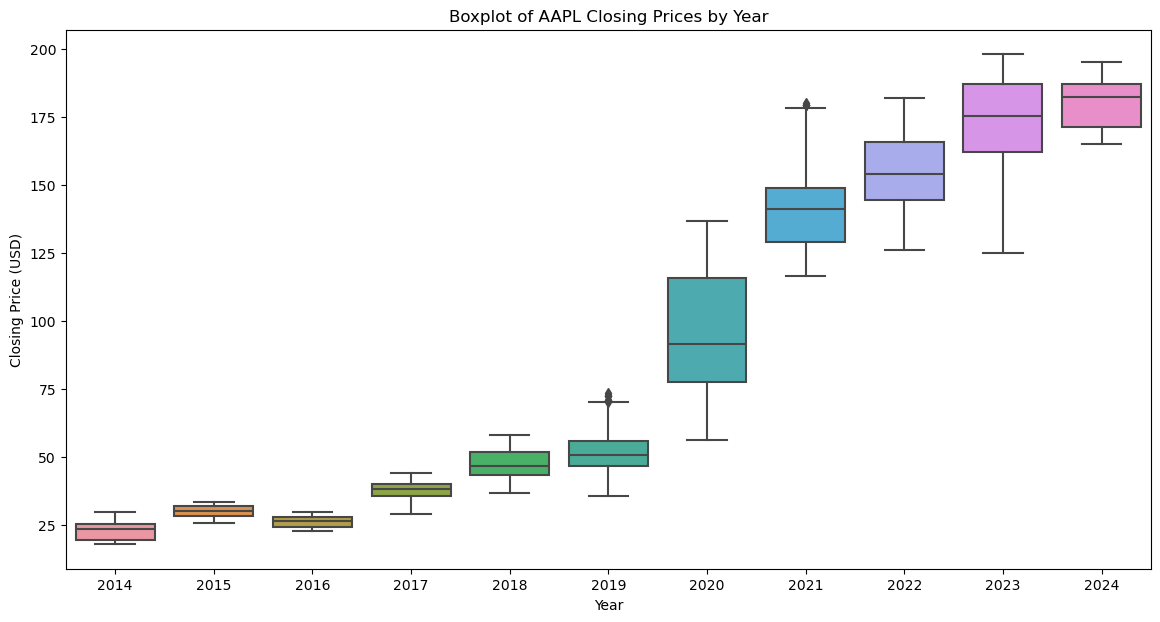

In [8]:
# Plot the closing price over time
plt.figure(figsize=(14, 7))
plt.plot(aapl_data['Close'])
plt.title('AAPL Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price (USD)')
plt.show()

# Plot the moving averages
aapl_data['30d_ma'] = aapl_data['Close'].rolling(window=30).mean()
aapl_data['50d_ma'] = aapl_data['Close'].rolling(window=50).mean()

plt.figure(figsize=(14, 7))
plt.plot(aapl_data['Close'], label='Closing Price')
plt.plot(aapl_data['30d_ma'], label='30 Day MA')
plt.plot(aapl_data['50d_ma'], label='50 Day MA')
plt.title('AAPL Closing Price and Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()

# Plot the distribution of the daily returns
aapl_data['Daily Return'] = aapl_data['Close'].pct_change()
plt.figure(figsize=(10, 5))
sns.histplot(aapl_data['Daily Return'].dropna(), bins=100, kde=True)
plt.title('Distribution of Daily Returns')
plt.xlabel('Daily Return')
plt.ylabel('Frequency')
plt.show()

# Boxplot of the adjusted closing prices by year
aapl_data['Year'] = aapl_data.index.year
plt.figure(figsize=(14, 7))
sns.boxplot(x='Year', y='Close', data=aapl_data.reset_index())
plt.title('Boxplot of AAPL Closing Prices by Year')
plt.xlabel('Year')
plt.ylabel('Closing Price (USD)')
plt.show()